1. Read Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [8]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [10]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [12]:
#applying tree algorithm
titanictree = tree.DecisionTreeClassifier()  
titanictree.fit(x_train, y_train)   #fitting our model
y_pred=titanictree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [13]:
text_representation = tree.export_text(titanictree)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  2.50
|   |   |   |--- feature_6 <= 26.12
|   |   |   |   |--- feature_3 <= 55.50
|   |   |   |   |   |--- feature_0 <= 48.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  48.00
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 206.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 195.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  195.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  206.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- feature_0 <= 815.00
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- featu

In [97]:
import graphviz
dot_data= tree.export_graphviz(titanictree,out_file=None,feature_names=data.featur filled = True) #filled = true :the method uses color to indicate the majority of the class
graph=graphviz.Source(dot_data) 
graph.render("data") # save the decision tree as a pdf file nammed data
graph

AttributeError: 'DataFrame' object has no attribute 'feature_names'

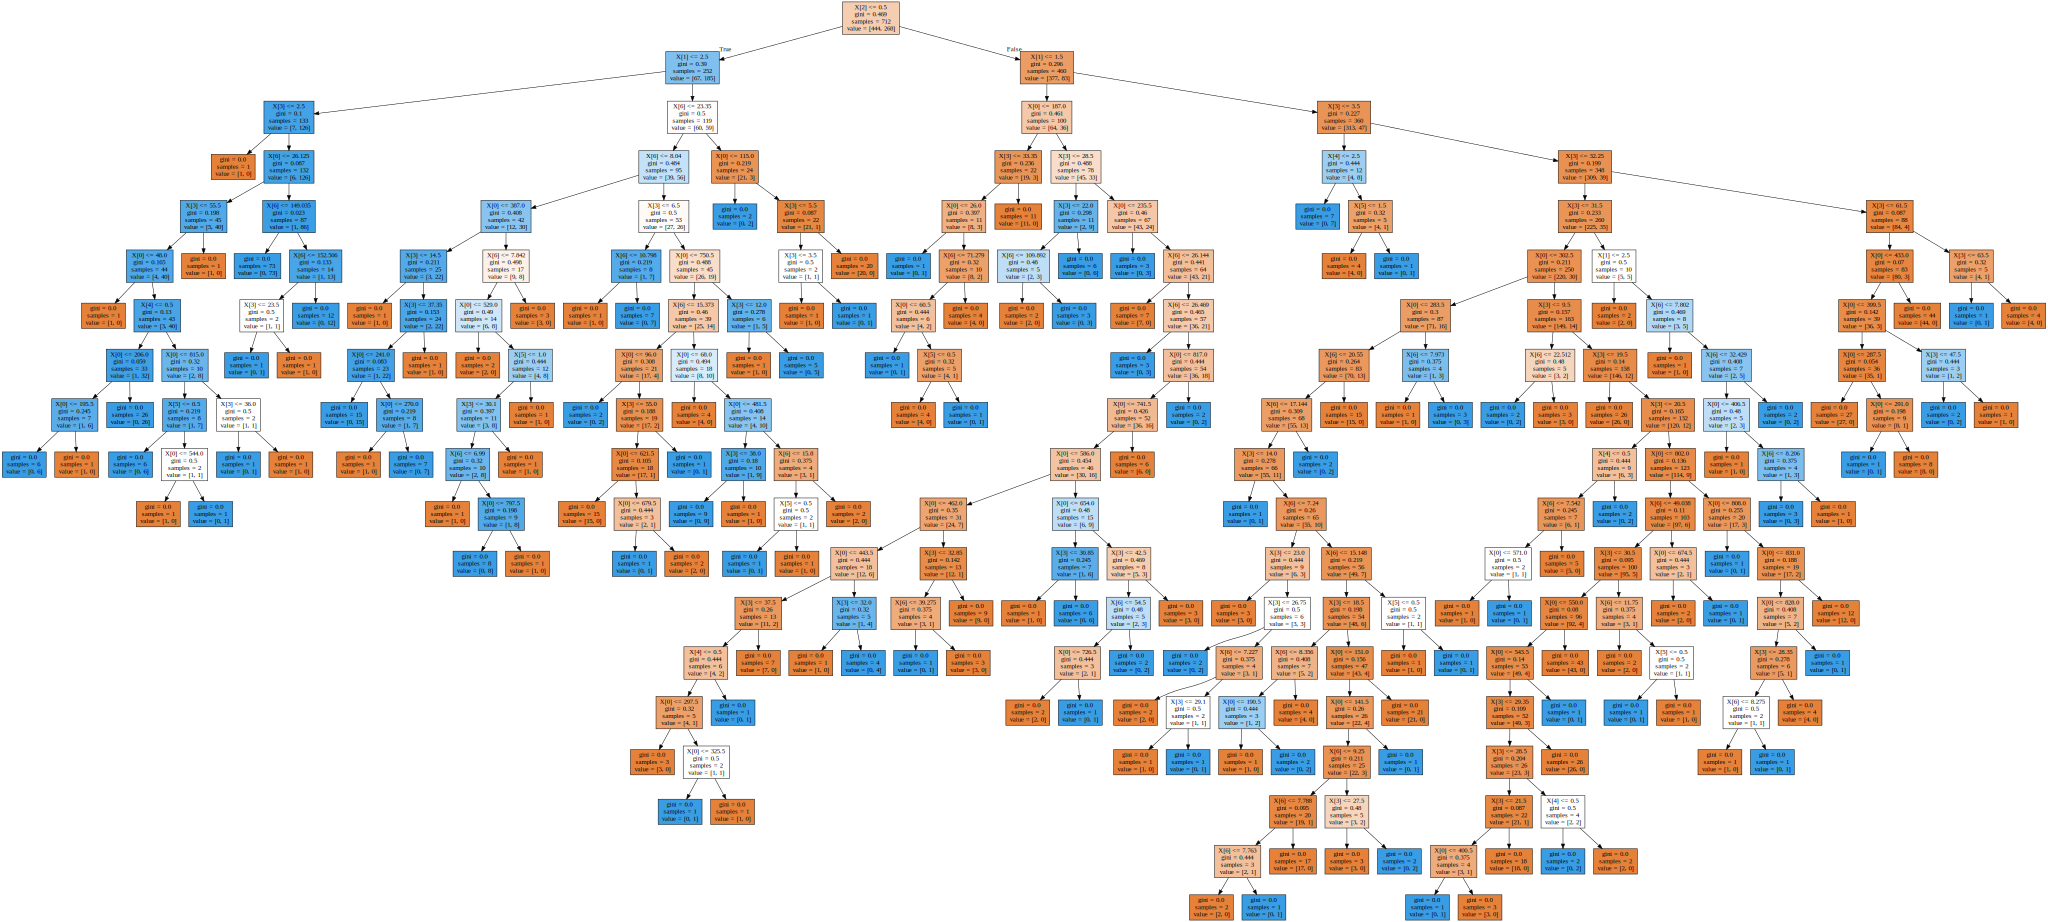

In [21]:
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [22]:
graph.render("decision_tree_graphivz")#save the figure to the .png file

'decision_tree_graphivz.png'

3. Change the decision tree parameters(at least two parameters). 

In [35]:
#lets check the best max_depth
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    dtree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    dtree.fit(x_train, y_train)
    score = dtree.score(x_test, y_test)
    accuracy.append(score)
print(accuracy)

[0.776536312849162, 0.770949720670391, 0.8044692737430168, 0.7877094972067039, 0.7932960893854749]


In [56]:
dtree = tree.DecisionTreeClassifier(criterion="gini",  max_depth=3)

4. Calculate the new accuracy and compare it with the previous results. 

In [57]:
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model

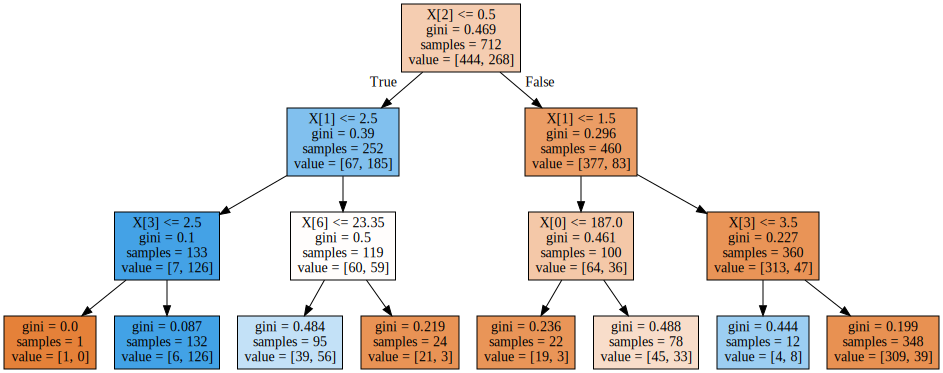

In [58]:
import graphviz
dot_data= tree.export_graphviz(dtree,out_file=None, filled = True) #filled = true :the method uses color to indicate the majority of the class
graph=graphviz.Source(dot_data) 
graph.render("data 2") # save the decision tree as a pdf file nammed data2
graph

In [59]:
#Accuracy
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


Well, the classification rate increased to 80.44%, which is better accuracy than the previous model.

5. Use a random forest then change the number of estimators.

In [96]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [94]:
clf=RandomForestClassifier(n_estimators=800)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model


6. Calculate the new accuracy and compare it with the previous result.

In [95]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8435754189944135


the classification rate increased to 84.35 %  when nombre of estimators increased.
A good approach is to create a random forest with a large number of estimators (e.g., 800-1000) and select an optimal subset of trees from it. Usually, the more entries in the training set, the more trees a random forest has to include.